In [1]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [2]:
scale = 1./16. #0.125
conversion = 0.6463

In [3]:
masks = glob.glob('./MASK 16-10-17 per GL/*.tif')
result_dir = './results_171016/'
masks

['./MASK 16-10-17 per GL/Mask 5-1.tif',
 './MASK 16-10-17 per GL/Mask 9-5.tif',
 './MASK 16-10-17 per GL/Mask 3-4.tif',
 './MASK 16-10-17 per GL/Mask4-1.tif',
 './MASK 16-10-17 per GL/Mask 7-3.tif',
 './MASK 16-10-17 per GL/Mask 8-4.tif',
 './MASK 16-10-17 per GL/Mask 1-1.tif',
 './MASK 16-10-17 per GL/Mask 2-4.tif',
 './MASK 16-10-17 per GL/Mask 10-6.tif',
 './MASK 16-10-17 per GL/Mask 10-7.tif',
 './MASK 16-10-17 per GL/Mask 4-2.tif',
 './MASK 16-10-17 per GL/Mask 3-3bis.tif',
 './MASK 16-10-17 per GL/Mask 3-5.tif',
 './MASK 16-10-17 per GL/Mask 1-2.tif',
 './MASK 16-10-17 per GL/Mask 1-5.tif']

In [4]:
results = {}

In [5]:
for filename in masks:
    mask_name = str.split(str.split(filename,'/')[-1],'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert
    mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite(result_dir+mask_name+'_msk.jpg',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite(result_dir+mask_name+'_thin.jpg',bw2)
    # distance transform
    # OpenCV 3
    #dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    
    # OpenCV 2
    dist = cv2.distanceTransform(mask_bw, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite(result_dir+mask_name+'_dt.jpg',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [6]:
print results

{'Mask 8-4': (102.50301, 39.45541, 1349), 'Mask 9-5': (97.793419, 33.739559, 1279), 'Mask 3-4': (108.0304, 41.295498, 1530), 'Mask 10-6': (107.77222, 44.934017, 1578), 'Mask 10-7': (102.02808, 37.614105, 1245), 'Mask 7-3': (103.67221, 34.993404, 1087), 'Mask4-1': (98.914803, 40.062336, 1874), 'Mask 1-5': (111.70311, 45.063995, 1814), 'Mask 4-2': (102.46535, 43.192543, 2020), 'Mask 2-4': (107.04426, 41.189529, 1518), 'Mask 3-5': (109.1105, 44.757549, 1852), 'Mask 5-1': (98.789383, 36.635715, 1145), 'Mask 1-1': (121.51368, 49.783417, 1066), 'Mask 3-3bis': (103.79517, 43.758869, 1415), 'Mask 1-2': (106.27253, 40.151001, 1853)}


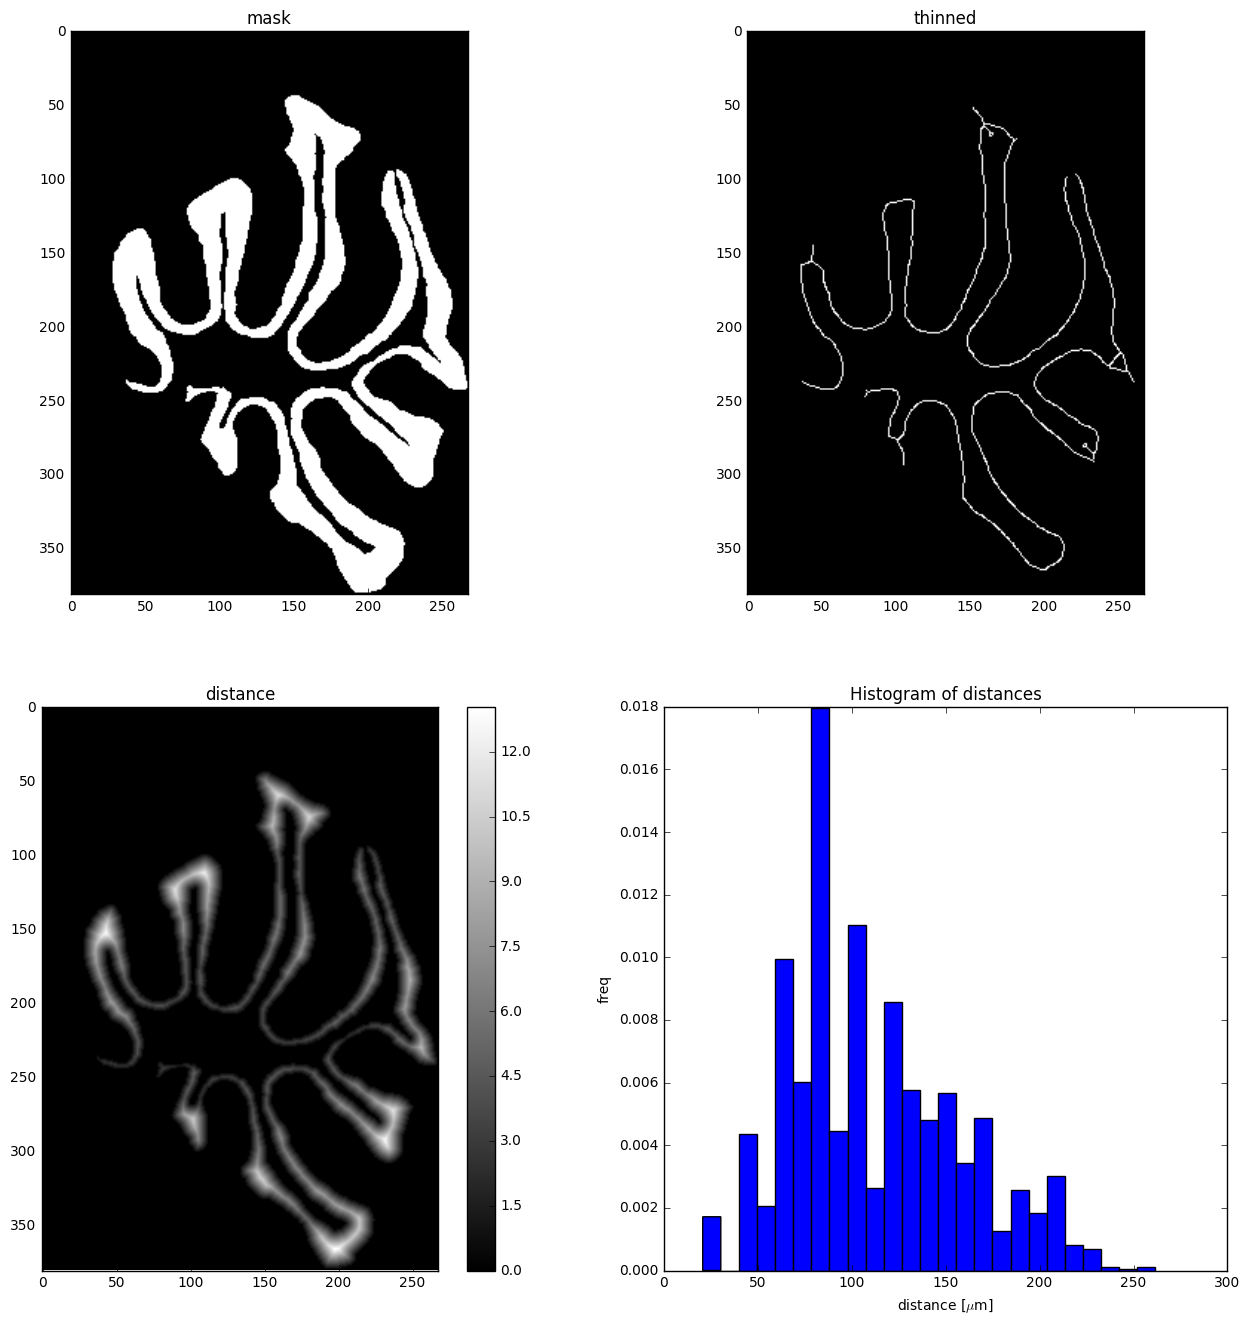

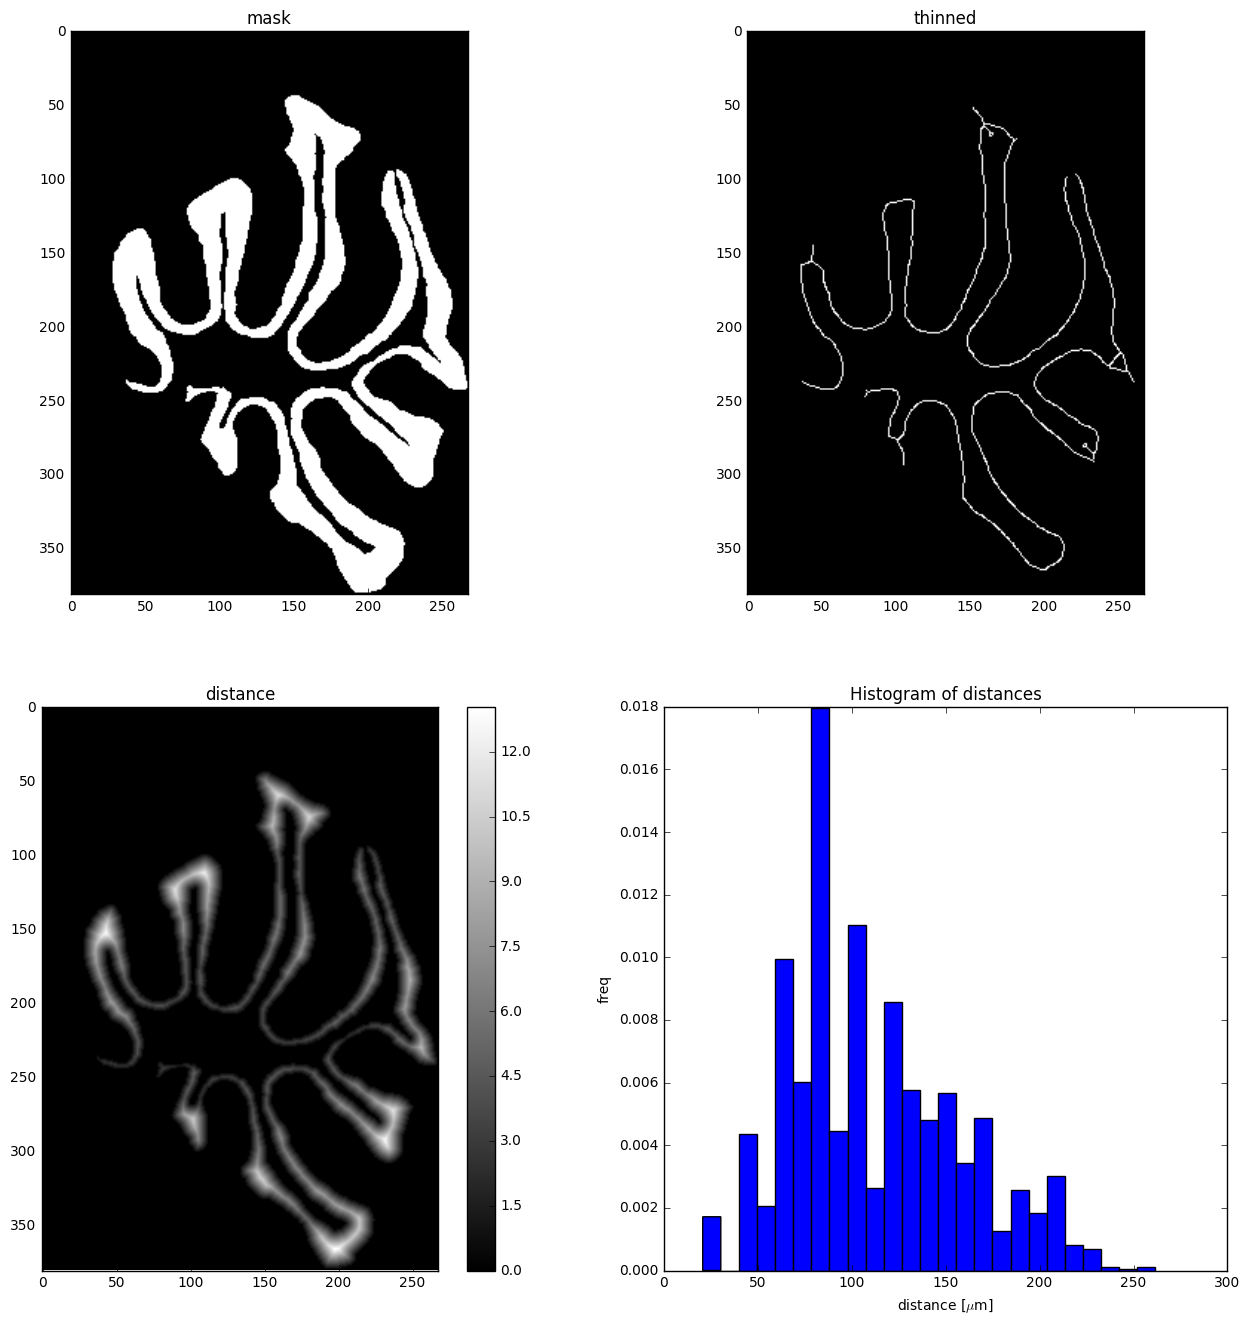

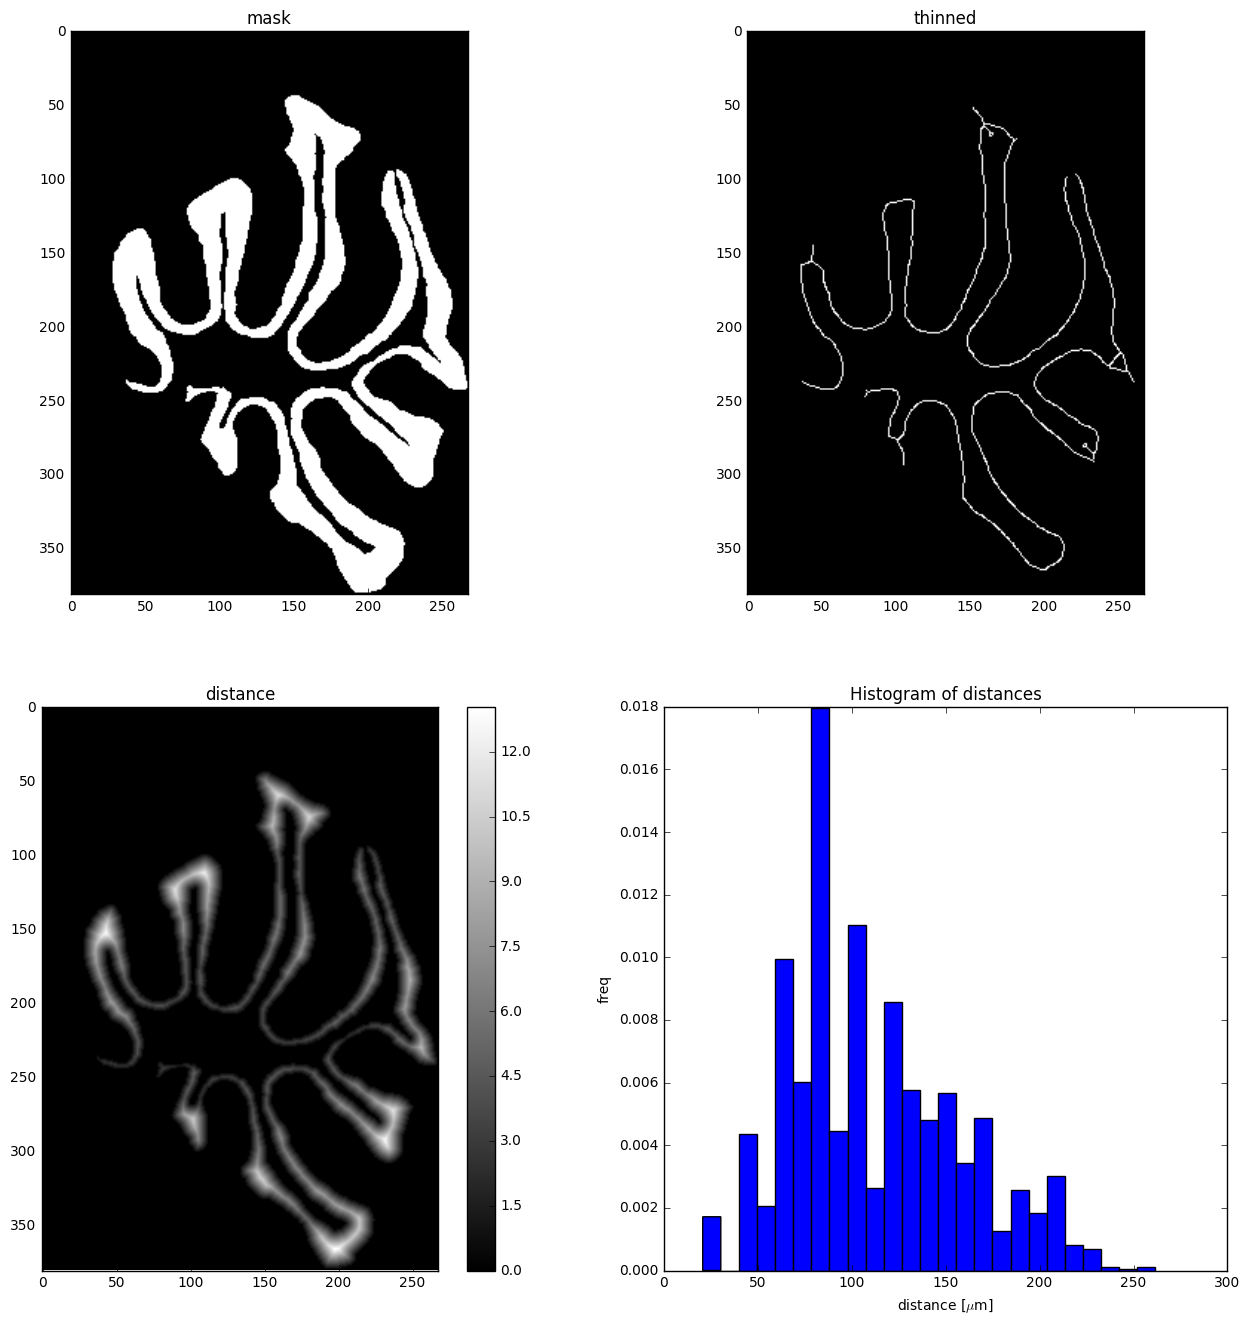

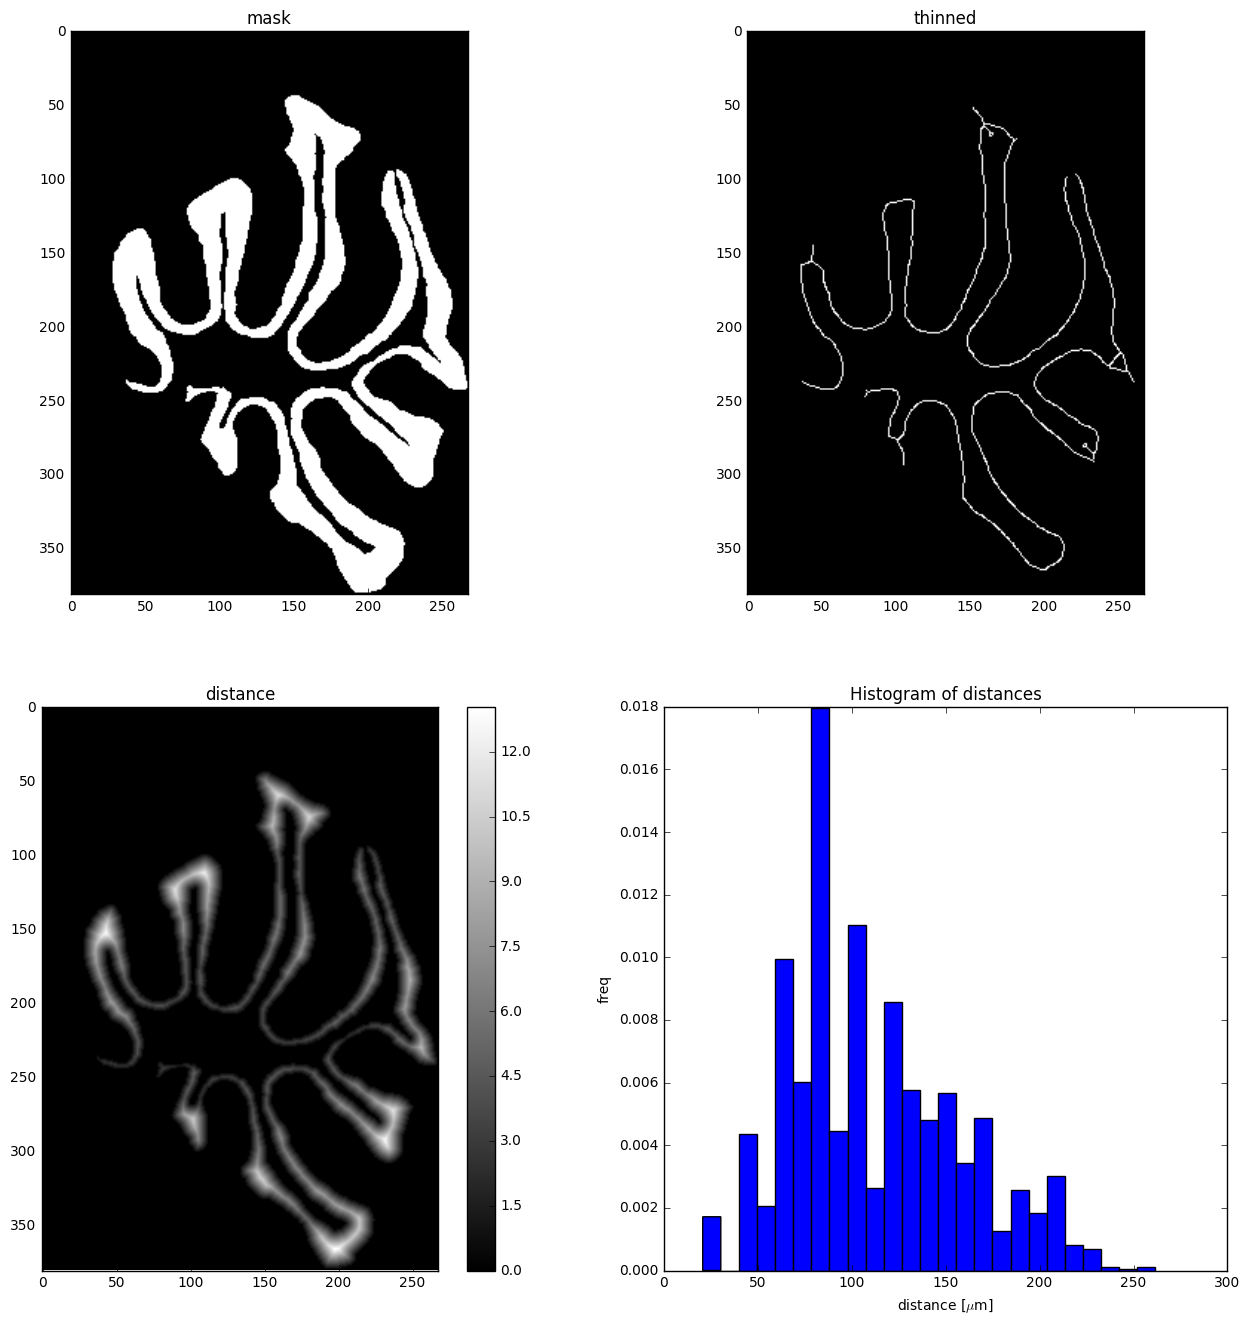

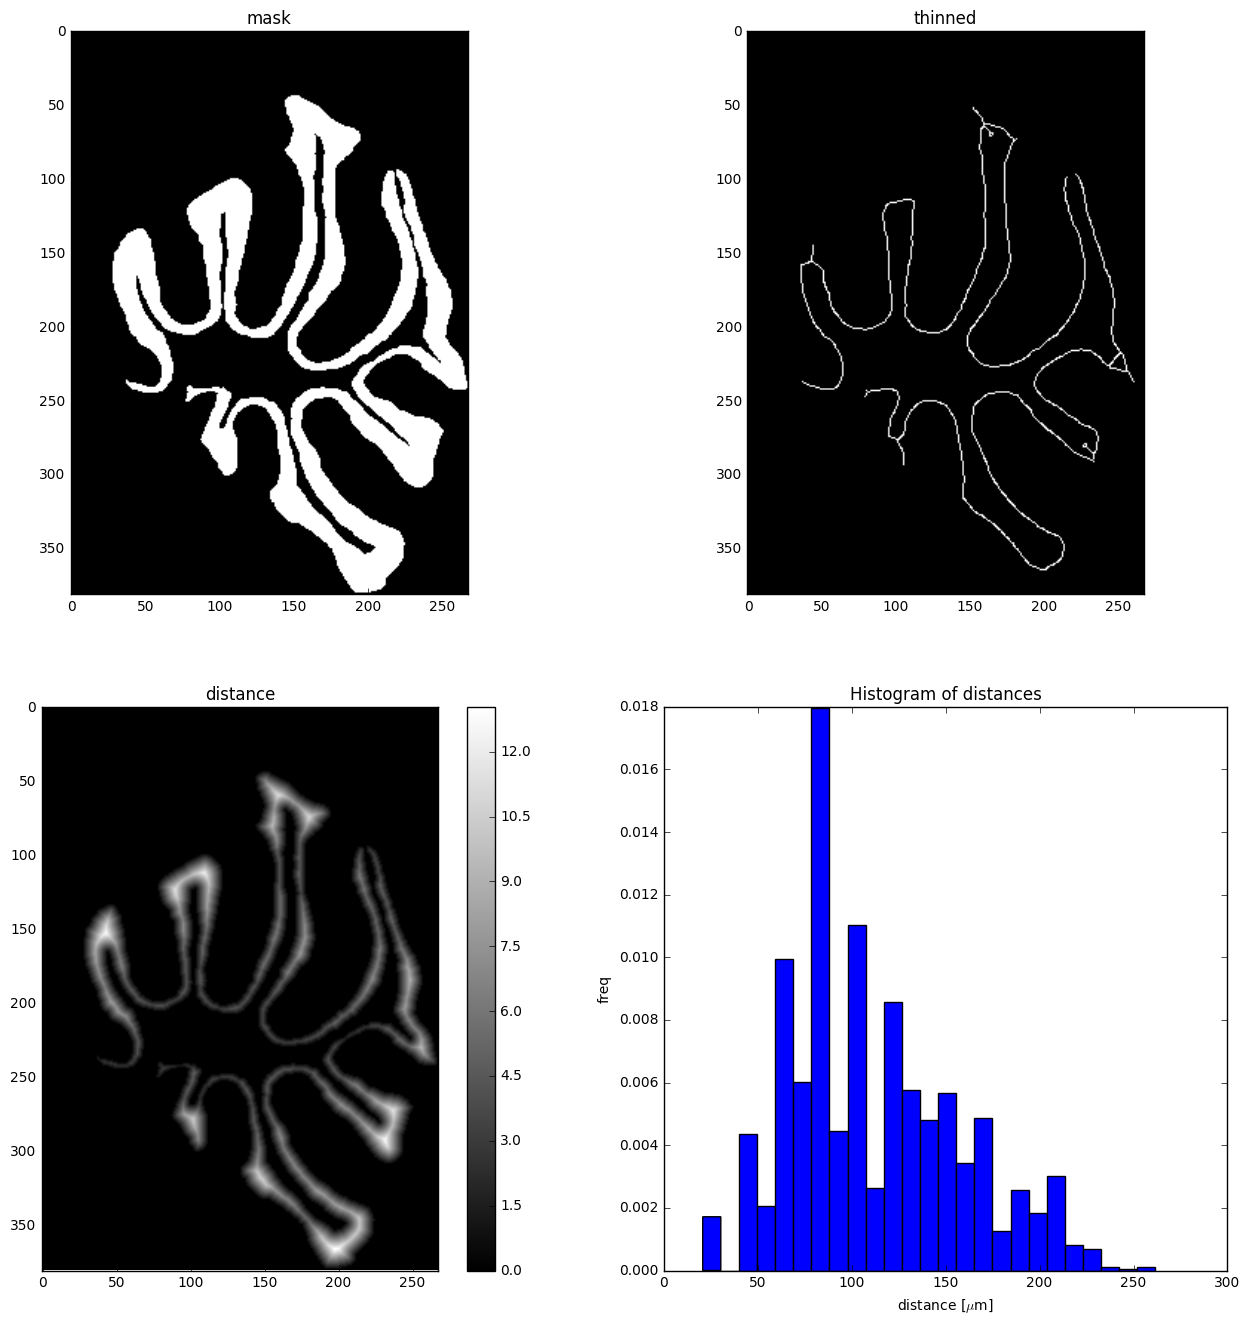

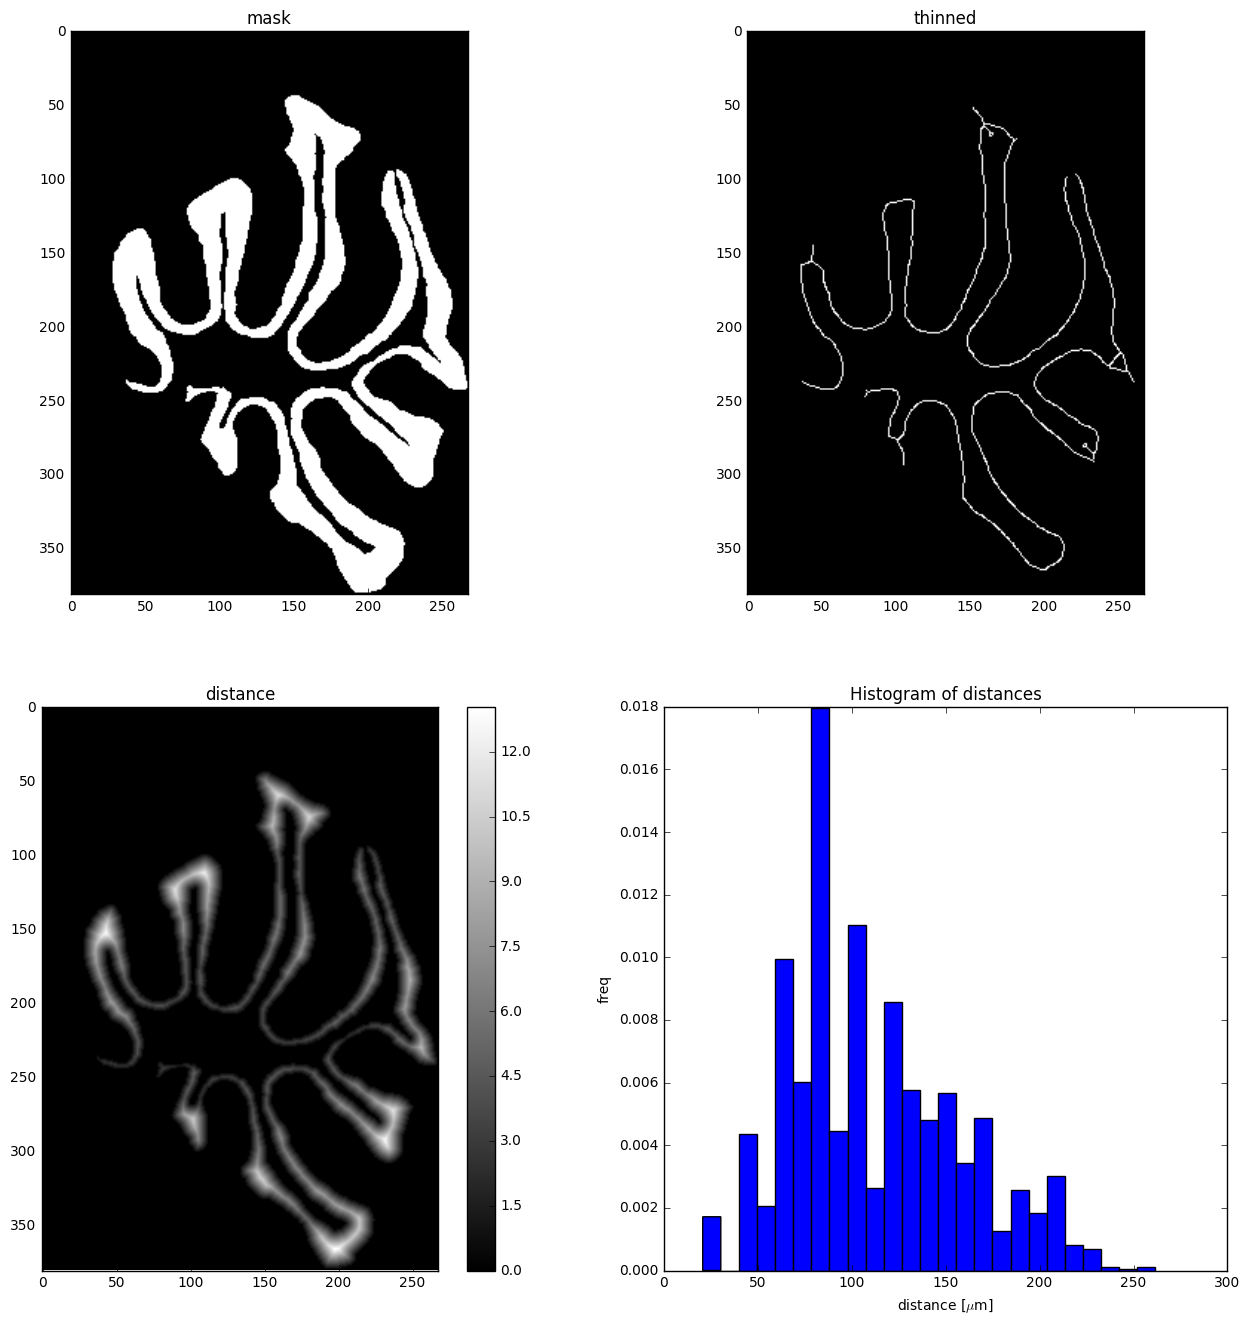

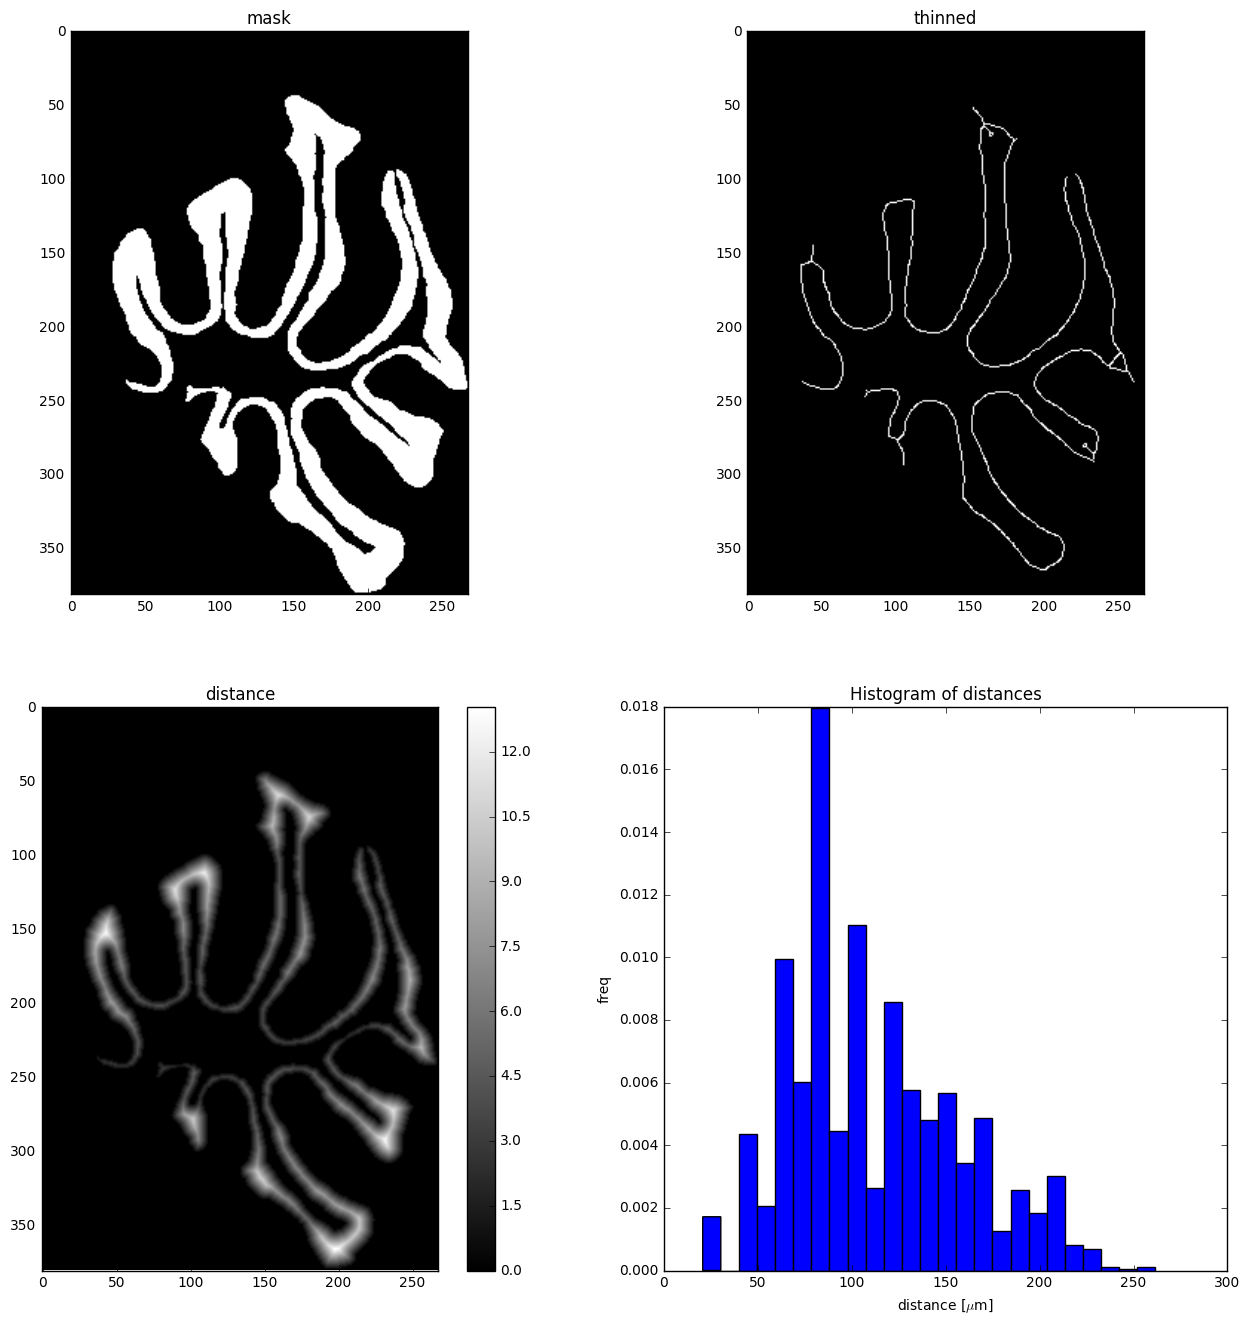

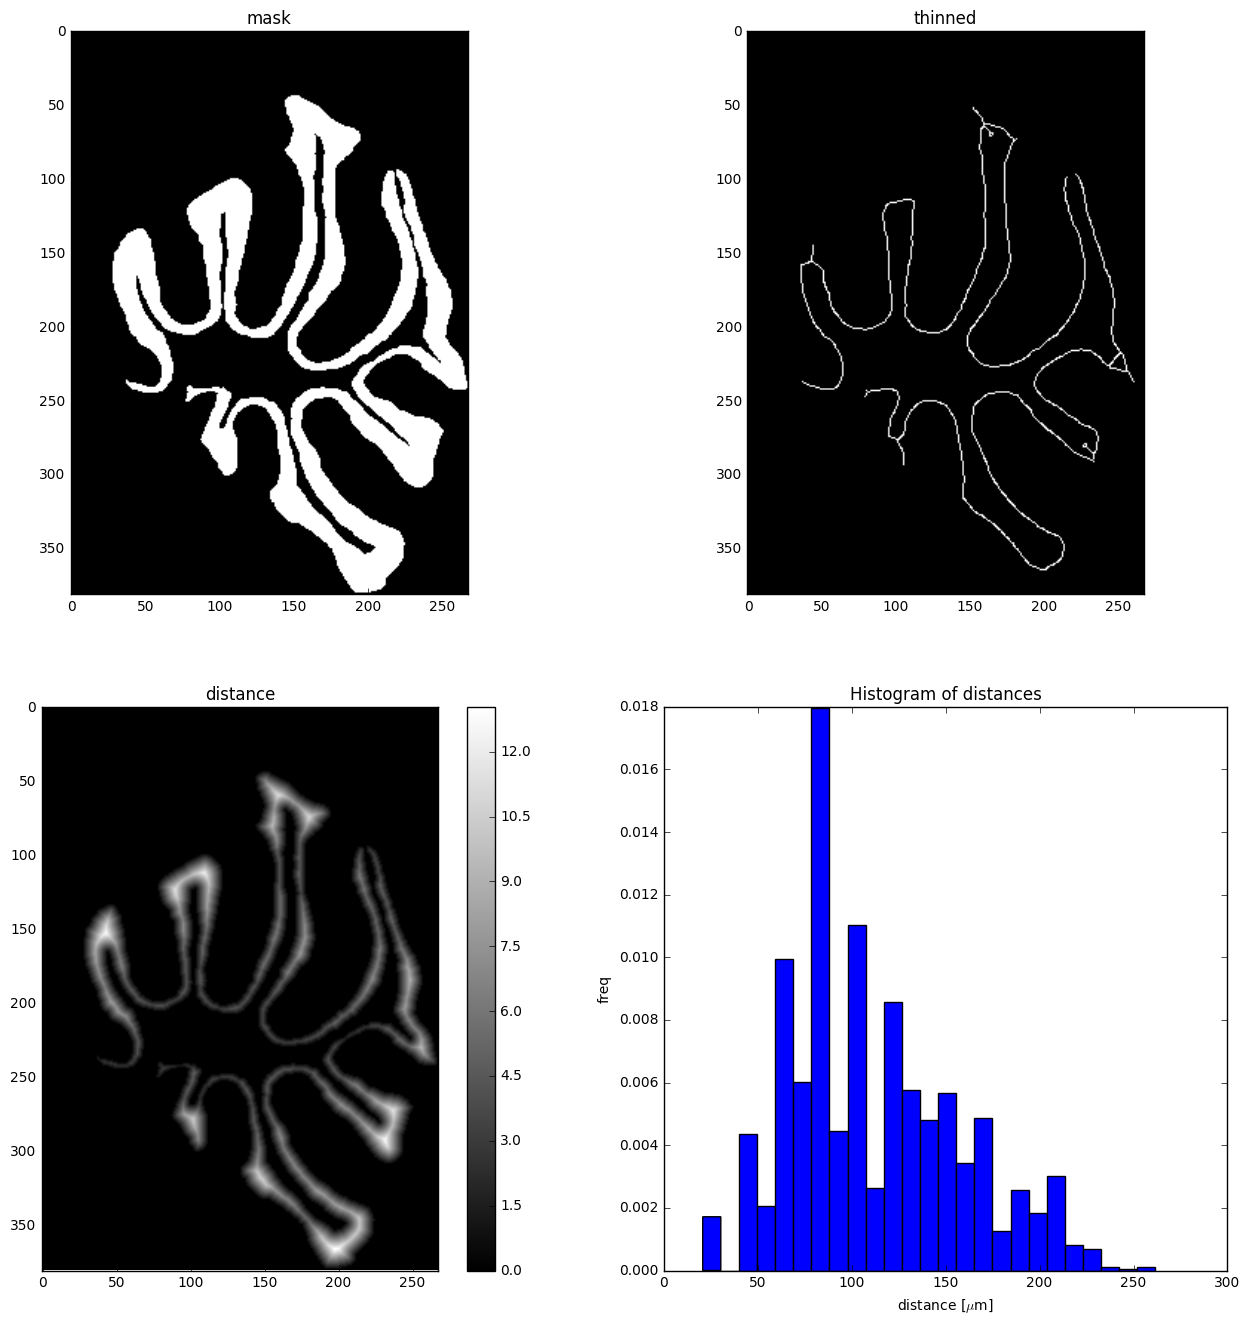

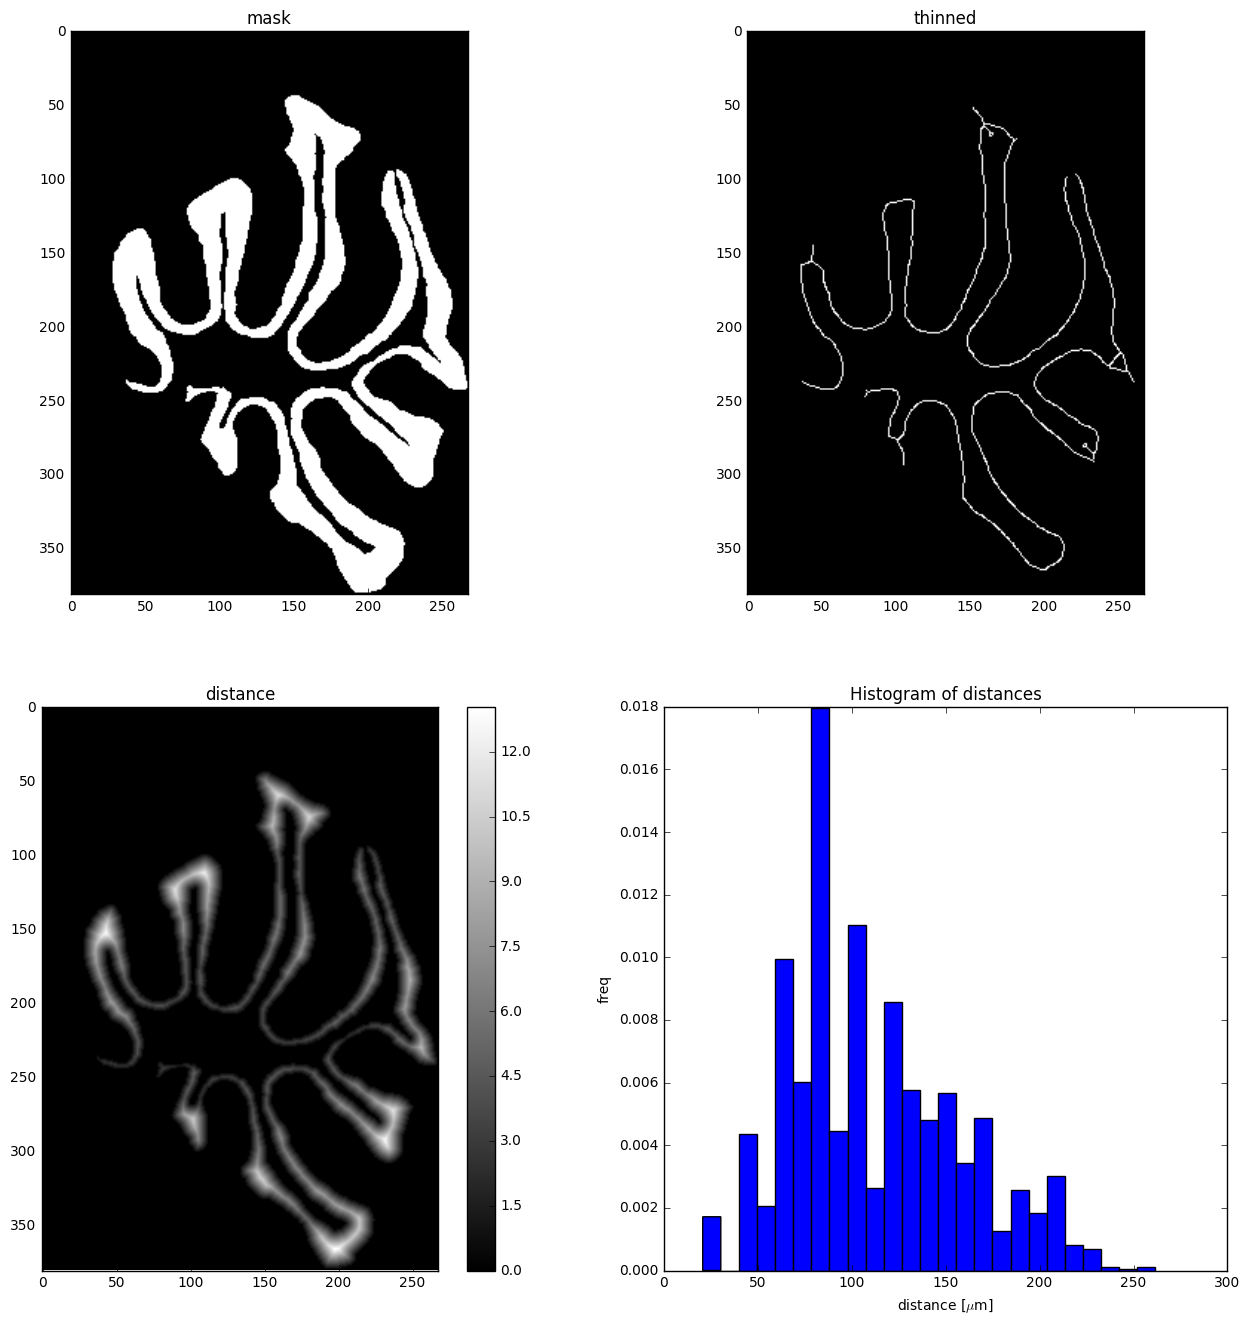

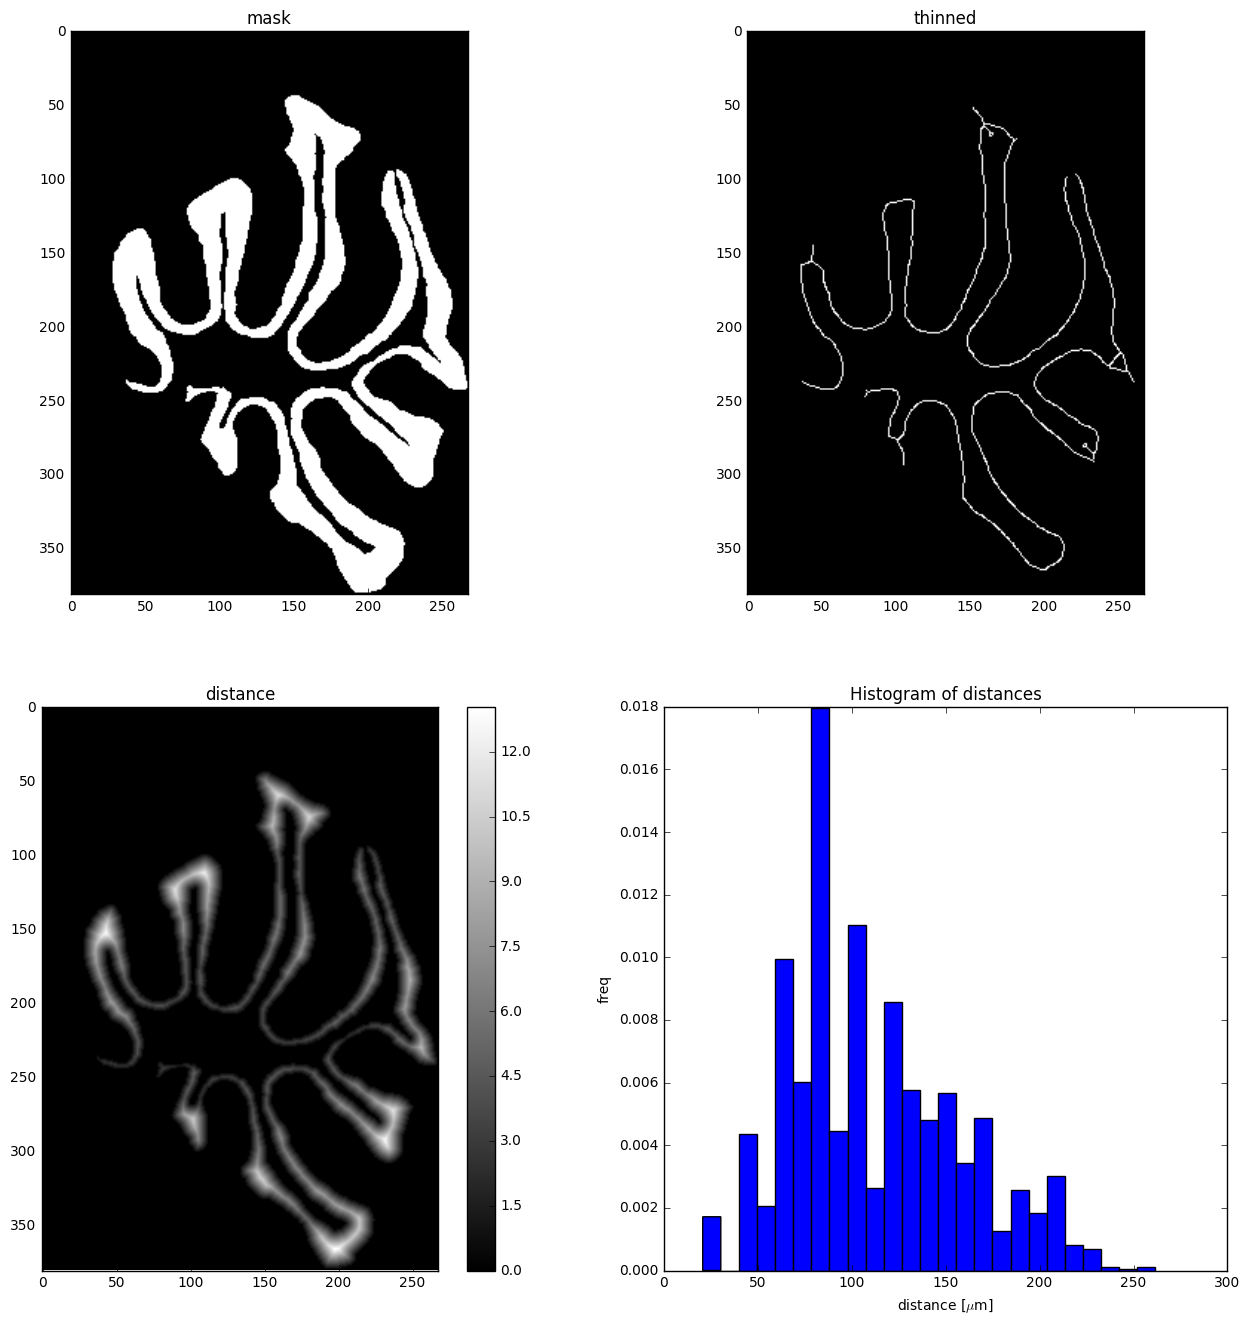

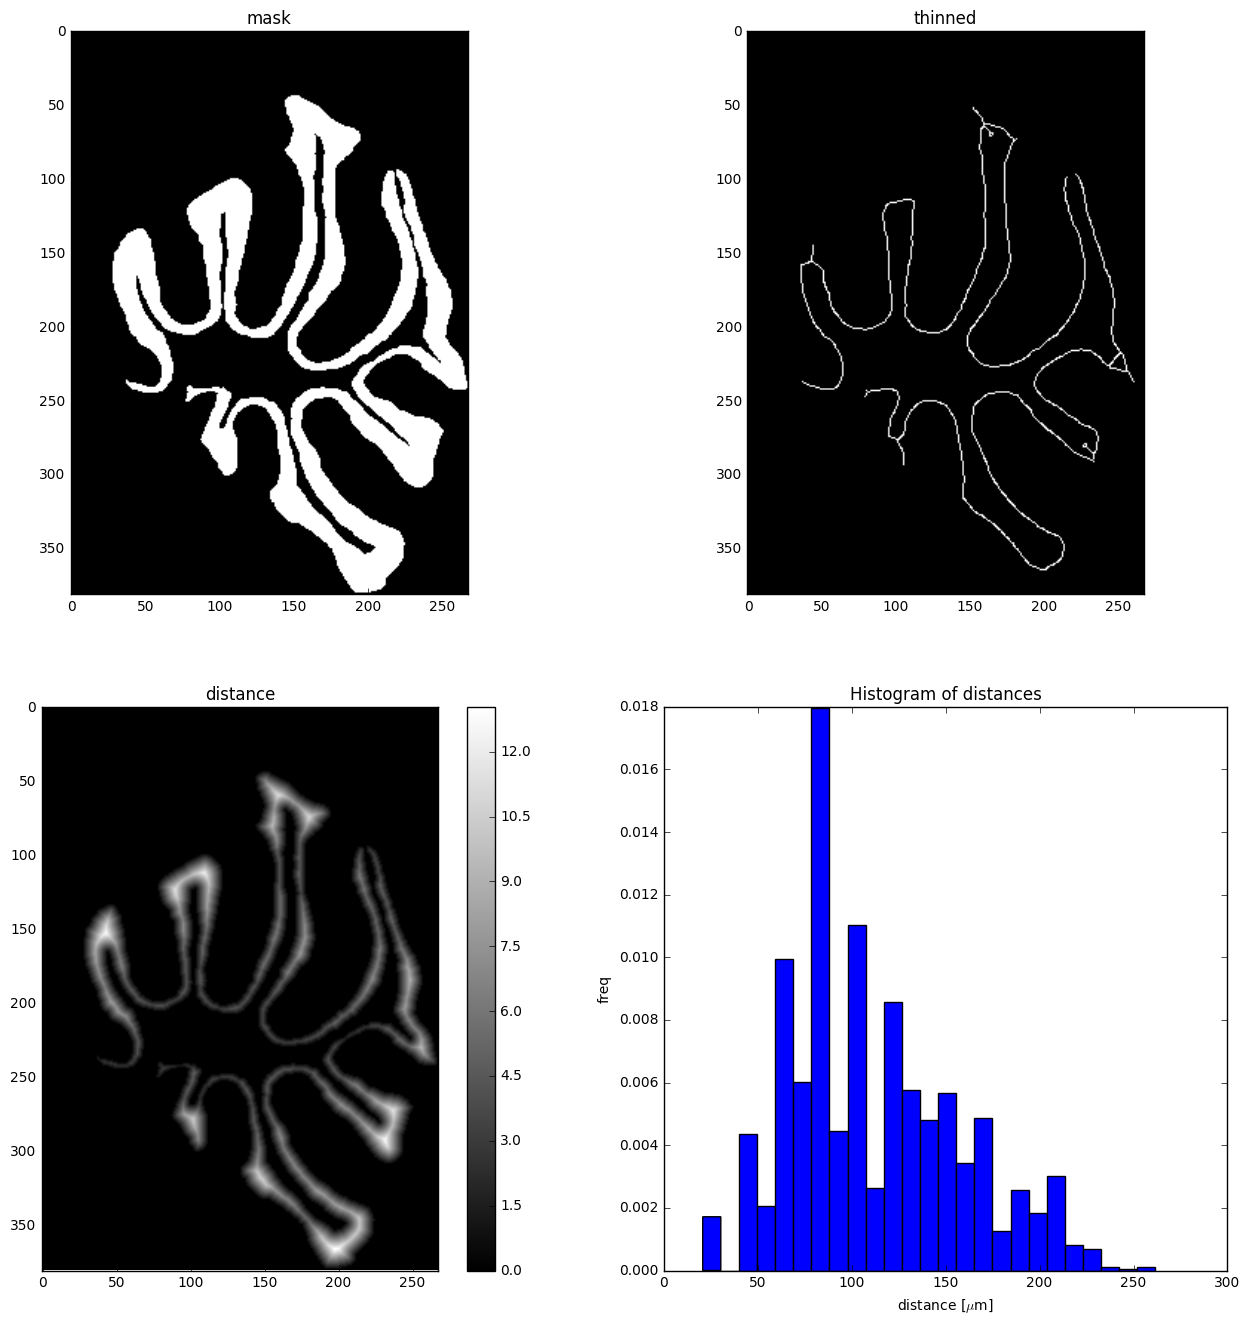

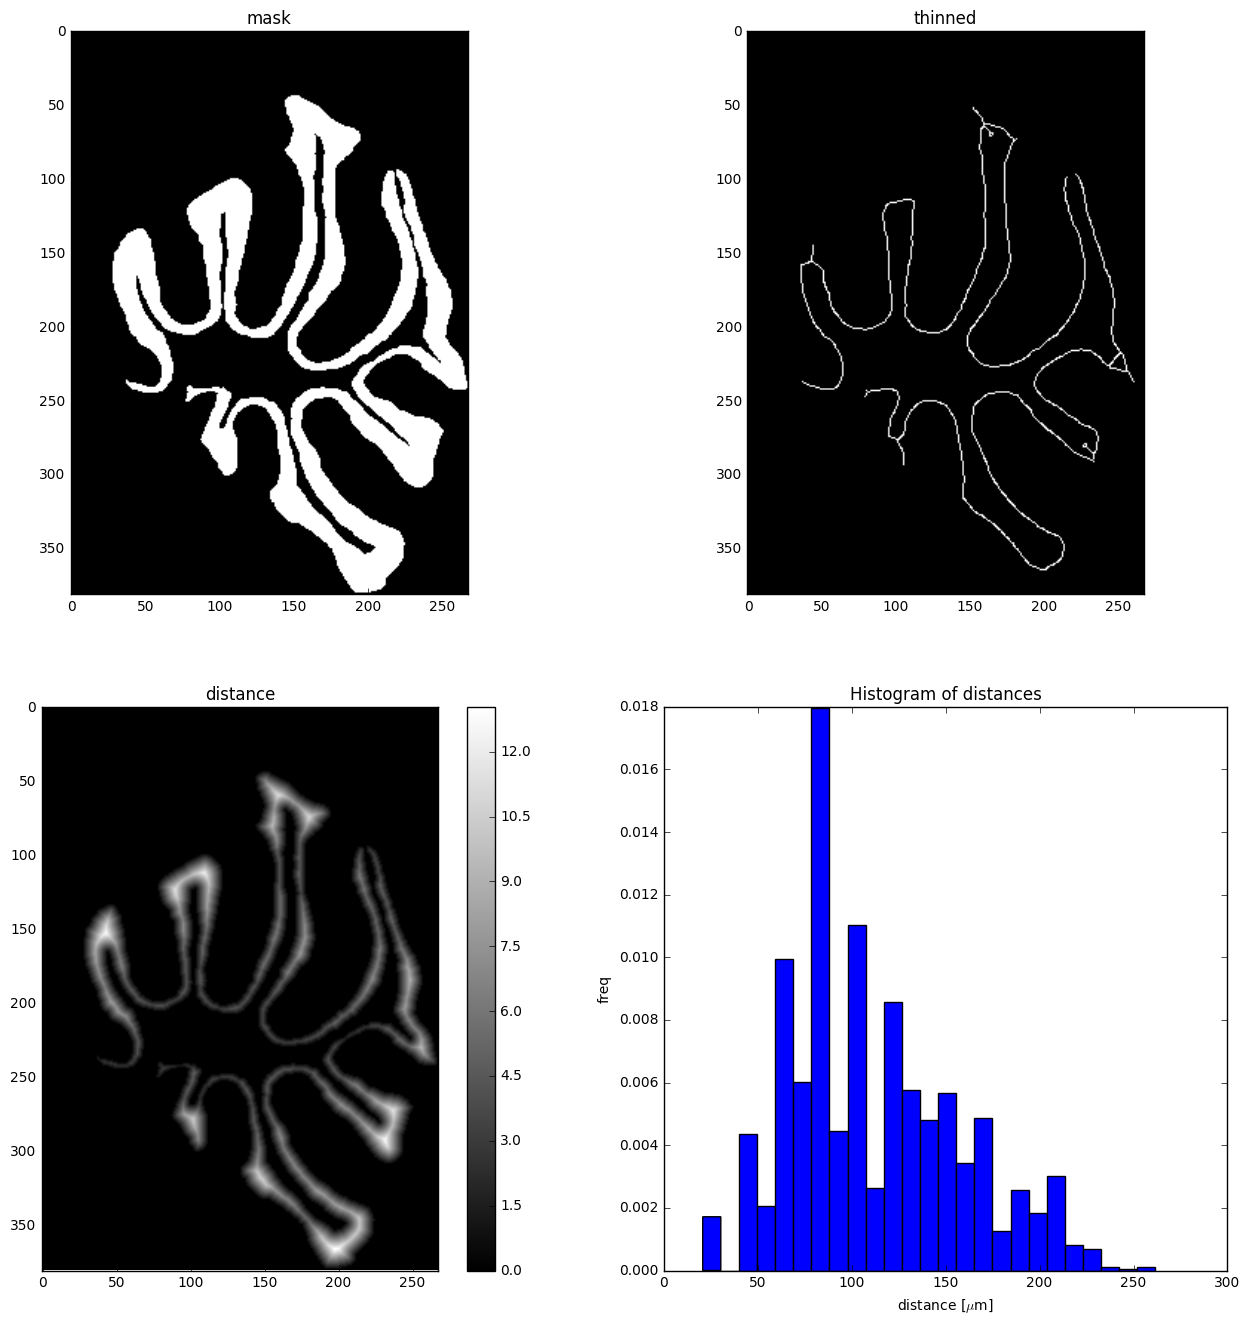

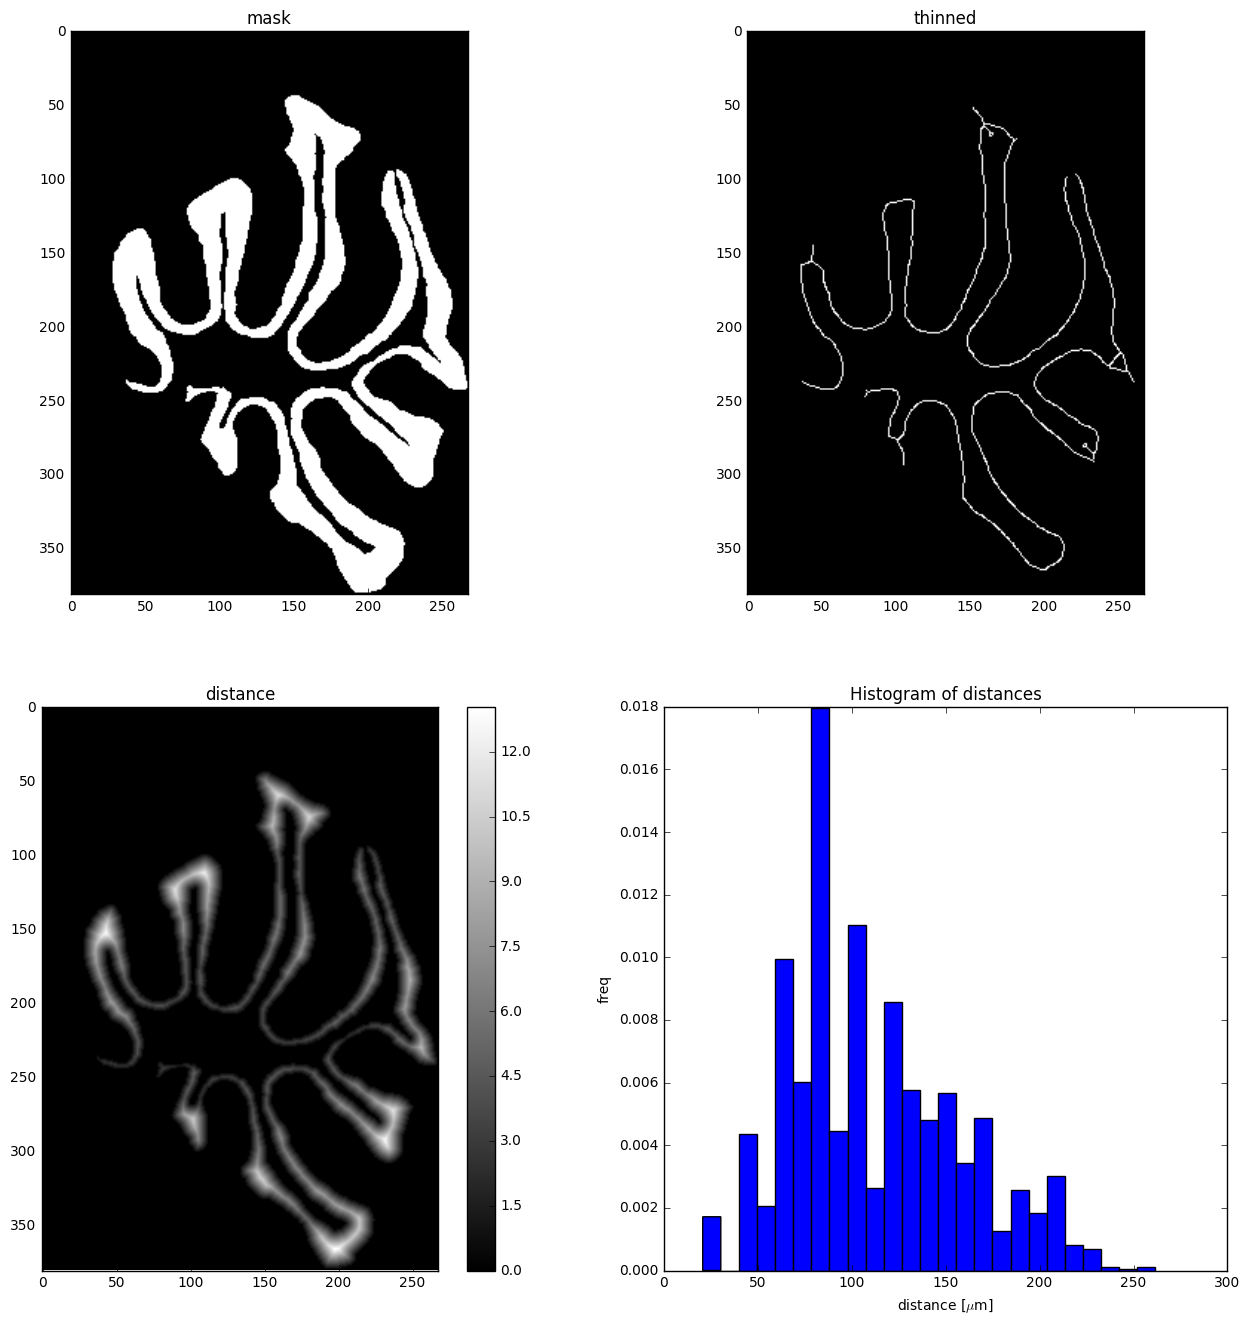

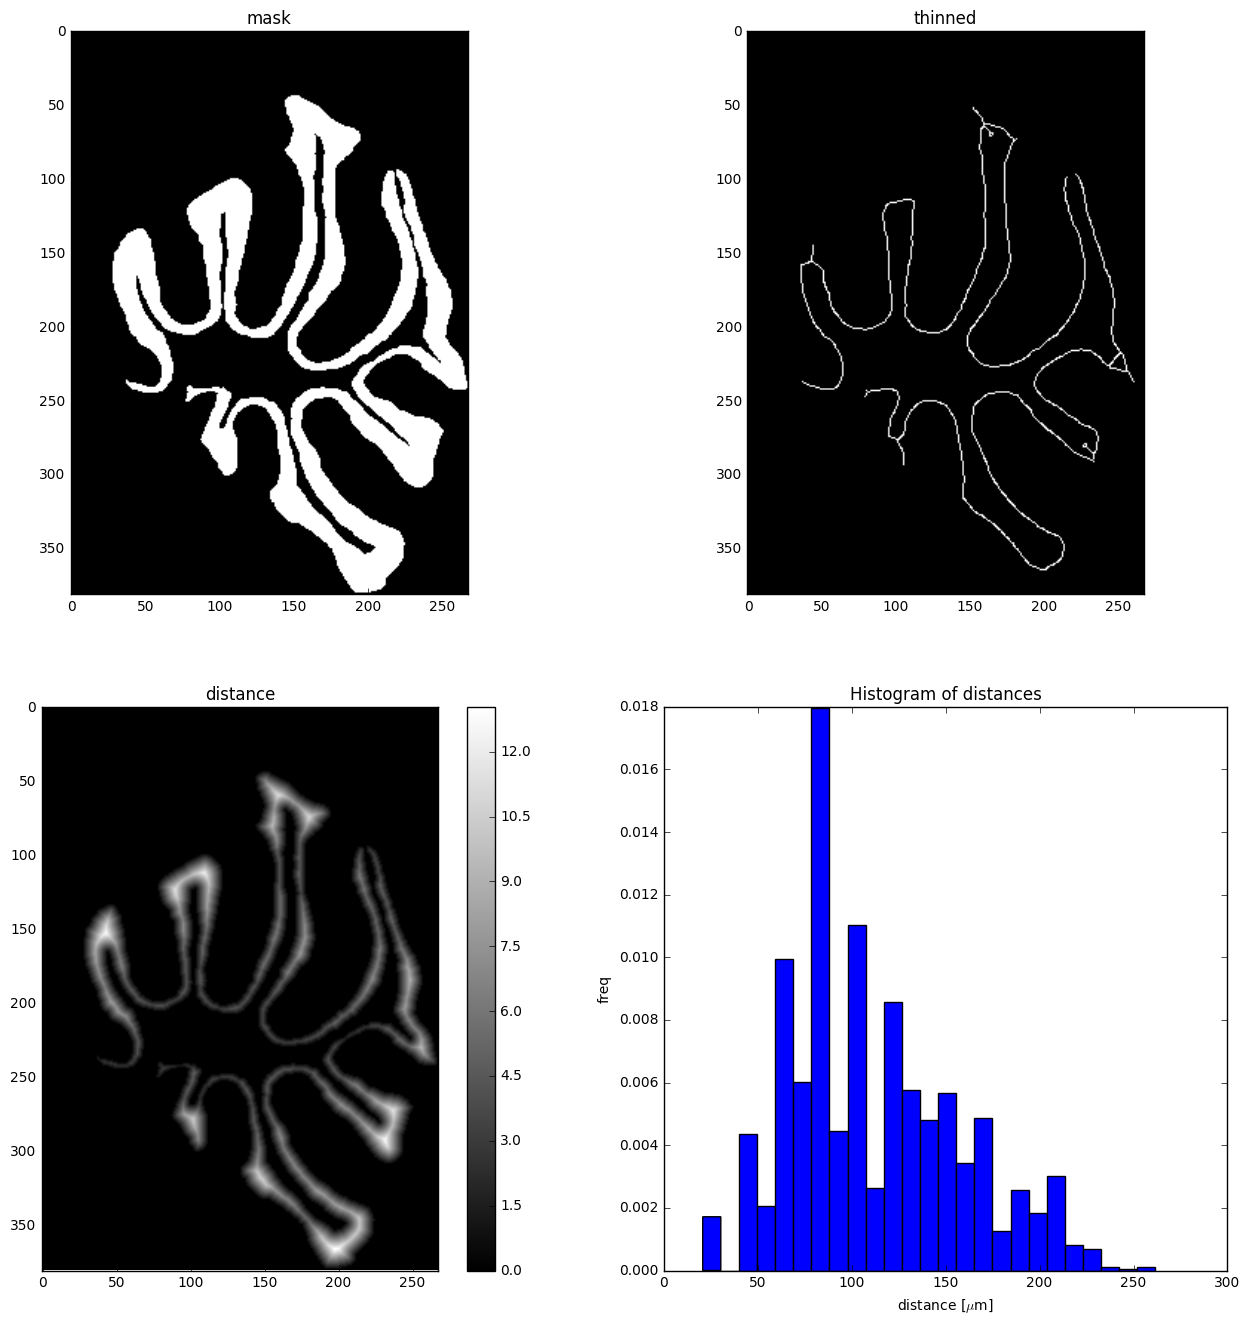

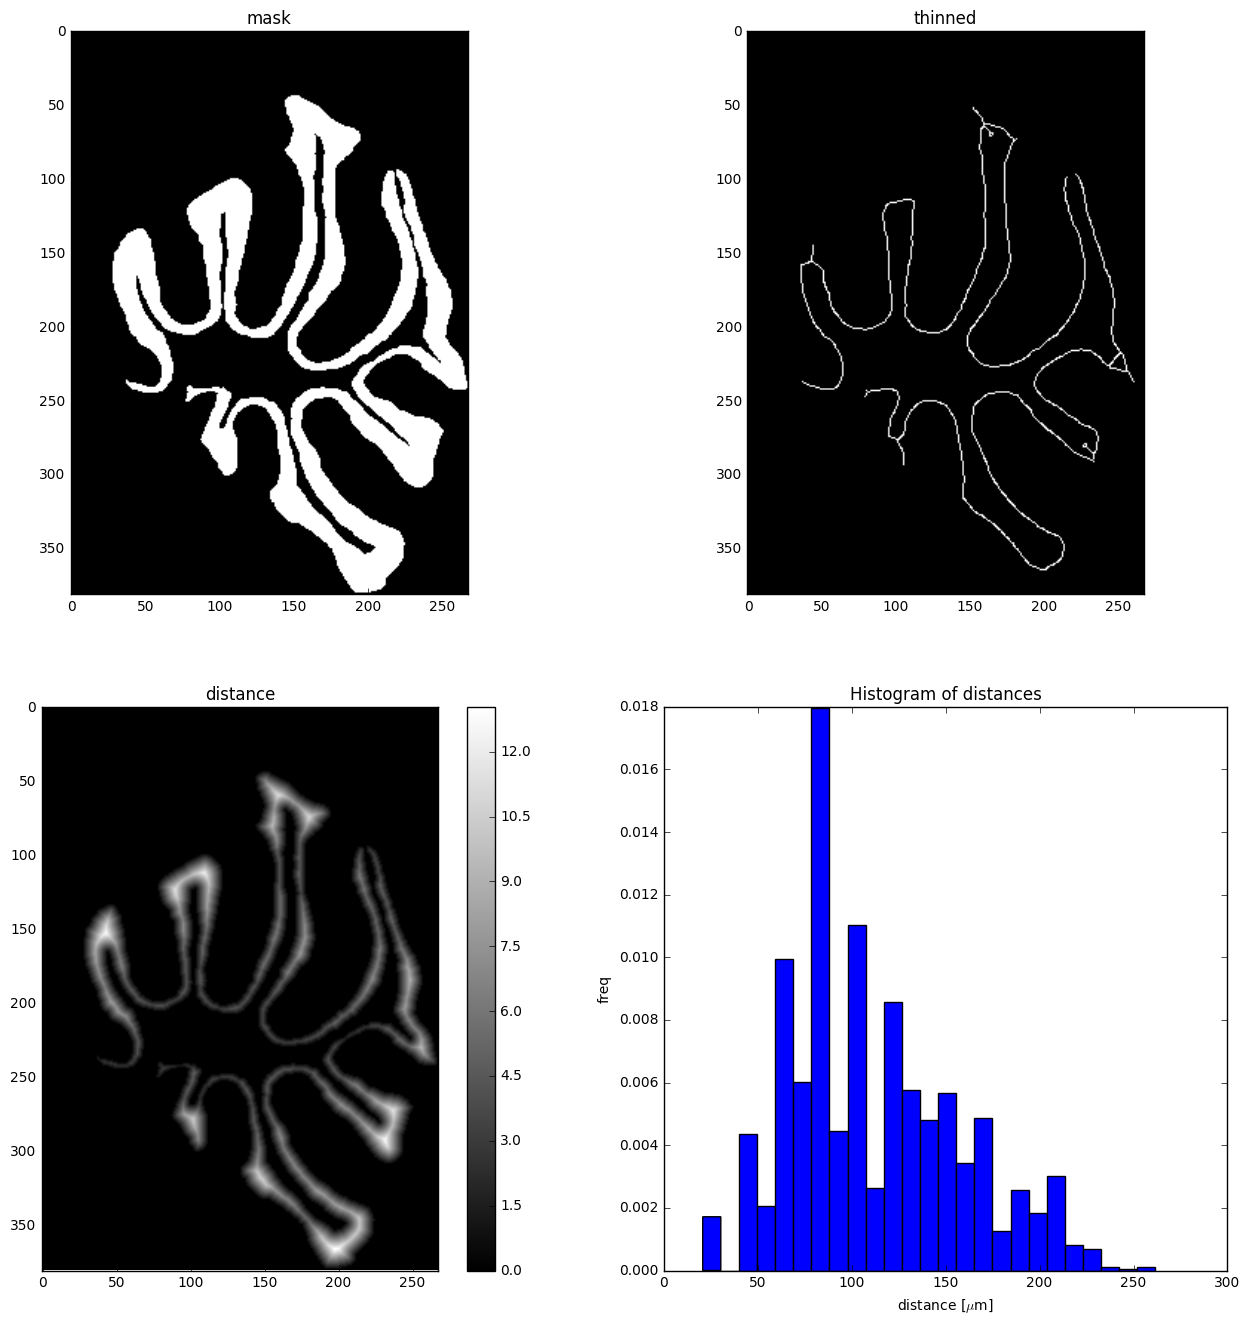

In [15]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    #plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.hist(th_values,bins=25,normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig(result_dir+mask+'_sp.png');

In [8]:
masks

['./MASK 16-10-17 per GL/Mask 5-1.tif',
 './MASK 16-10-17 per GL/Mask 9-5.tif',
 './MASK 16-10-17 per GL/Mask 3-4.tif',
 './MASK 16-10-17 per GL/Mask4-1.tif',
 './MASK 16-10-17 per GL/Mask 7-3.tif',
 './MASK 16-10-17 per GL/Mask 8-4.tif',
 './MASK 16-10-17 per GL/Mask 1-1.tif',
 './MASK 16-10-17 per GL/Mask 2-4.tif',
 './MASK 16-10-17 per GL/Mask 10-6.tif',
 './MASK 16-10-17 per GL/Mask 10-7.tif',
 './MASK 16-10-17 per GL/Mask 4-2.tif',
 './MASK 16-10-17 per GL/Mask 3-3bis.tif',
 './MASK 16-10-17 per GL/Mask 3-5.tif',
 './MASK 16-10-17 per GL/Mask 1-2.tif',
 './MASK 16-10-17 per GL/Mask 1-5.tif']

In [9]:
import pprint

In [10]:
pprint.pprint(results)

{'Mask 1-1': (121.51368, 49.783417, 1066),
 'Mask 1-2': (106.27253, 40.151001, 1853),
 'Mask 1-5': (111.70311, 45.063995, 1814),
 'Mask 10-6': (107.77222, 44.934017, 1578),
 'Mask 10-7': (102.02808, 37.614105, 1245),
 'Mask 2-4': (107.04426, 41.189529, 1518),
 'Mask 3-3bis': (103.79517, 43.758869, 1415),
 'Mask 3-4': (108.0304, 41.295498, 1530),
 'Mask 3-5': (109.1105, 44.757549, 1852),
 'Mask 4-2': (102.46535, 43.192543, 2020),
 'Mask 5-1': (98.789383, 36.635715, 1145),
 'Mask 7-3': (103.67221, 34.993404, 1087),
 'Mask 8-4': (102.50301, 39.45541, 1349),
 'Mask 9-5': (97.793419, 33.739559, 1279),
 'Mask4-1': (98.914803, 40.062336, 1874)}


38